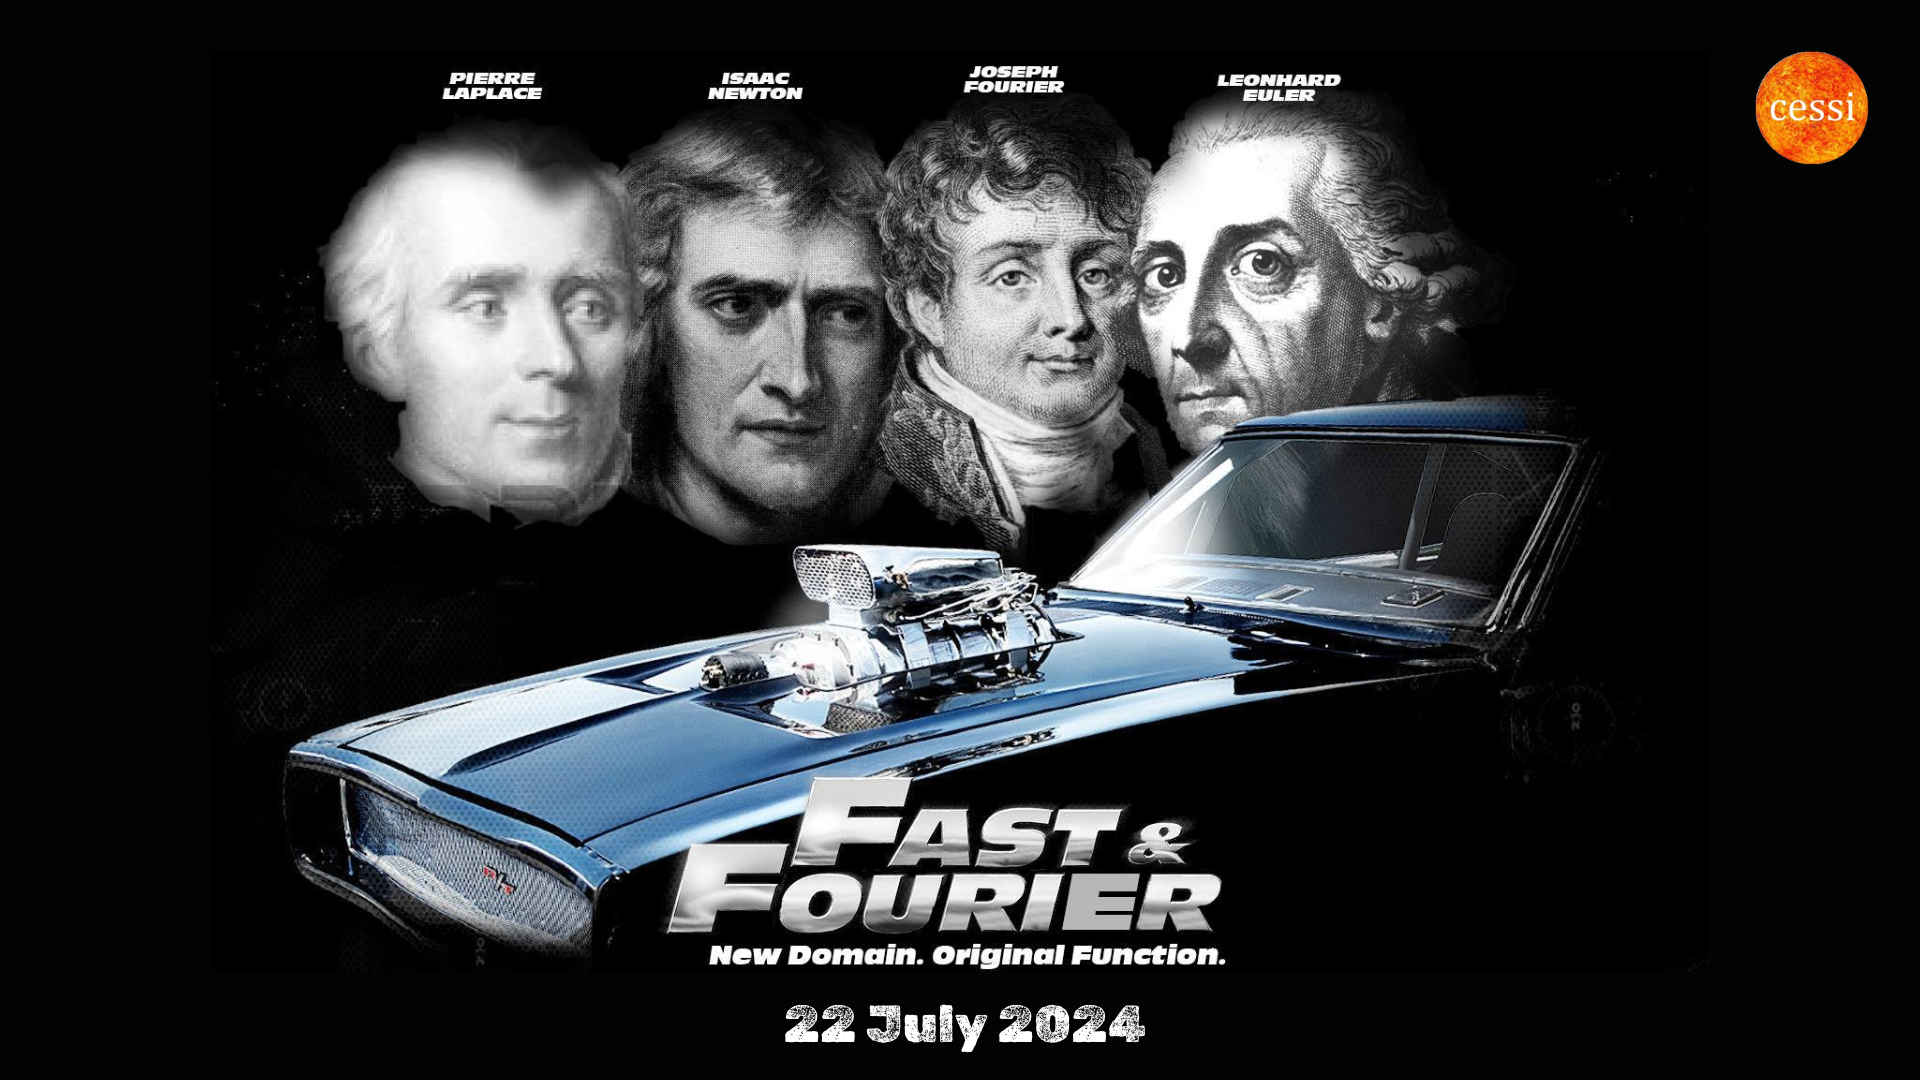

In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib
import matplotlib.pyplot as plt

In [10]:
params = {'legend.fontsize': 16,
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize' :20,
          'ytick.labelsize': 20,
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5,
          'mathtext.fontset' : 'stix',
          'mathtext.rm'      : 'DejaVu serif',
          'font.family'      : 'DejaVu serif',
          'font.serif'       : "Times New Roman", # or "Times"          
         }
matplotlib.rcParams.update(params)

<h1 align="center">Fourier Series</h1> 

$$
$$

**Fourier theorem:** Any **square integrable function**, $f(x)$, in the interval $[-\pi,\pi]$ can be expressed as, 

$$
f(x)=\sum_{n=0}^{\infty} a_n \cos n x+\sum_{n=1}^{\infty} b_n \sin n x  \tag{1}
$$
where the constants $a_n$ and $b_n$ are given by,
$$
\begin{aligned}
& a_n=\frac{1}{\pi} \int_{-\pi}^{+\pi} f(x) \cos n x d x \quad n \geq 0 \\
& b_n=\frac{1}{\pi} \int_{-\pi}^{+\pi} f(x) \sin n x d x \quad n>0 \\
&
\end{aligned}\tag{2}
$$

This representation of function $f(x)$ is called the Fourier series.

$$
$$

$$
$$

<h3 align="left">Extended domain</h3> 


The Fourier series can be extended to arbitrary interval, i.e., from $[-\pi, \pi]$ to $[-L, L]$ by scaling. Any square integrable function in this interval $[-L, L]$ can be expressed in terms of Fourier series as given in eq.(1) above,
$$
f(x)=\sum_{n=0}^{\infty} a_n \cos n x+\sum_{n=1}^{\infty} b_n \sin n x \tag{3}
$$
where the coeffients $a_n$ and $b_n$ are given by,
$$
\begin{aligned}
& a_n=\frac{1}{L} \int_{-L}^{+L} f(x) \cos \left(\frac{n \pi x}{L}\right) d x, \\
& b_n=\frac{1}{L} \int_{-L}^{+L} f(x) \sin \left(\frac{n \pi x}{L}\right) d x
\end{aligned}\tag{4}
$$


$$
$$



**And, there you go! One can literally approximate any arbitrary closed curve in terms of Fourier sinusoids. Following is a not-so-serious example.**


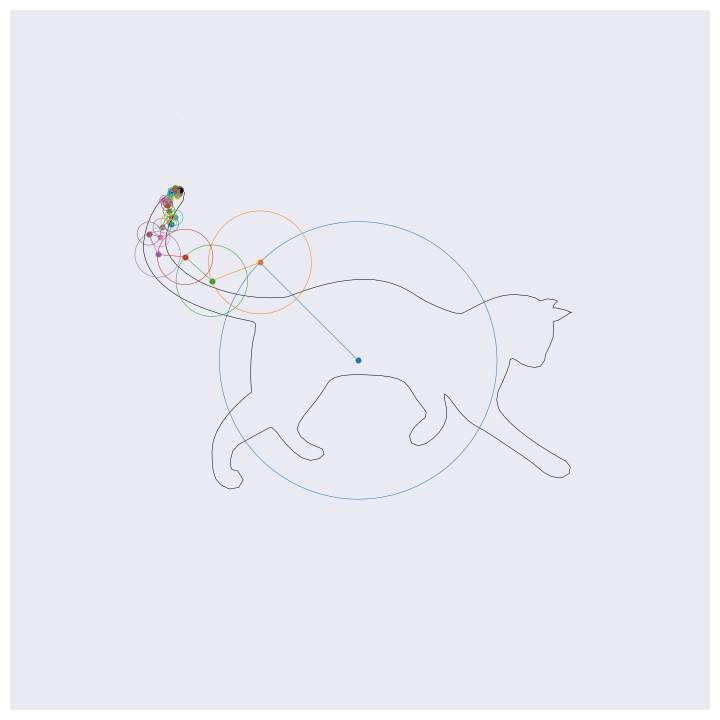

$$
$$

<h2 align="left">Problem I</h2> 

Express the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function), 
$$
f(x)= \begin{cases}-1 & (x<0) \\ +1 & (x \geq 0)\end{cases}
$$

In Fourier series.

$$
$$

Solution: The coeffients $a_n$ and $b_n$ can be determined by the above eq.
$$
\begin{aligned}
a_0 & =\frac{1}{\pi} \int_{-\pi}^0(-1) d x+\frac{1}{\pi} \int_0^{+\pi}(+1) d x=0 \\
a_n & =\frac{1}{\pi} \int_{-\pi}^0(-\cos n x) d x+\frac{1}{\pi} \int_0^{+\pi}(+\cos n x) d x=0 \\
b_n & =\frac{1}{\pi} \int_{-\pi}^0(-\sin n x) d x+\frac{1}{\pi} \int_0^{+\pi}(+\sin n x) d x \\
& =\frac{2}{\pi} \int_0^\pi \sin n x d x=\left\{\begin{array}{cl}
\frac{4}{n \pi} & (n=\text { odd }) \\
0 & (n=\text { even })
\end{array}\right.
\end{aligned}
$$

The function $f(x)$ can be written as,
$$
f(x)=\frac{4}{\pi} \sum_{n=\text { odd }}^{\infty} \frac{1}{n} \sin n x
$$
or
$$
f(x)=\frac{4}{\pi} \sum_{n=0}^{\infty} \frac{1}{2 n+1} \sin (2 n+1) x
$$

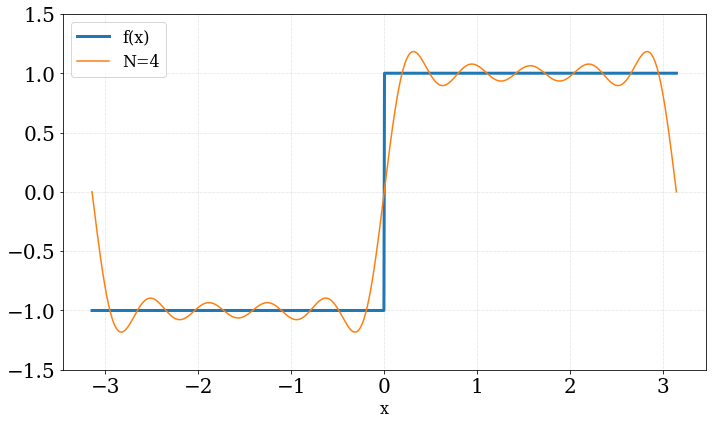

In [30]:
#defining the Heaviside step function
def f(x) :
    fx=np.ones(x.shape)
    (idx,)= np.where( x < 0 )
    fx[idx]=-1
    return fx
    
x=np.linspace(-np.pi, np.pi, 1000)
fx=f(x)

# =================================
infinity=5 #change here
# =================================


# calculating the infinite sum
fourierf=np.zeros(x.shape)
for n in range(infinity) :
    term=4/np.pi * 1/(2*n+1) * np.sin((2*n+1)*x)
    fourierf+=term
    
# plotting the results    
fig,ax = plt.subplots(figsize=(10, 6))    
plt.plot(x, fx, 'C0', label='f(x)', lw=3)
plt.plot(x, fourierf, 'C1',label='N='+str(n) )
plt.grid(alpha=0.3)
plt.xlabel('x')
plt.xlim([ -1.1*np.pi, 1.1*np.pi])
plt.ylim([-1.5, 1.5])
plt.legend()
plt.tight_layout()


**Gibb's phenomenon**

- The $N$-th partial Fourier series of the function (formed by summing the $N$ lowest constituent sinusoids of the Fourier series of the function) produces large peaks around the jump which overshoot and undershoot the function values. This oscillatory behavior of Fourier series is called the [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).


- As more sinusoids are used, this approximation error reduces, and eventually the infinite Fourier series sum does eventually converge almost everywhere.

$$
$$

---

<h1 align="center">Fourier Transform</h1> 
$$
$$

In a Fourier transform, a signal is sampled over a period of time and divided into its frequency components. These components are single sinusoidal oscillations at distinct frequencies each with their own amplitude and phase. This transformation is illustrated in the following diagram. Over the time period measured, the signal contains **three** distinct dominant frequencies. 

$$
$$

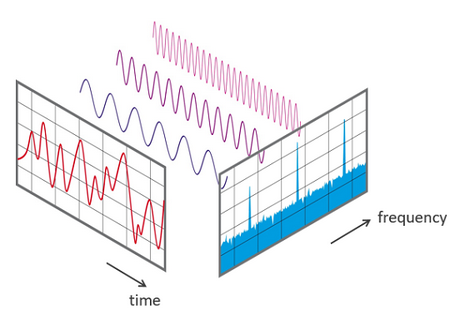

$$
$$

Mathematically, this transformation is expressed as,

$$
f(k) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i k x} dx \tag{5}
$$

**Discrete Fourier transformn (DFT):** In practical sense, the above definition in eq.(5) is not always helpful since it is rare to have functional forms of time series. To apply this method to real world data we need a definition for a **discrete** set of values. This is given by the Discrete Fourier Transform (DFT) which is the Fourier transform of a discrete sequence of values, 

$$
f_k = \Sigma_{0}^{N-1} x_n e^{-\dfrac{2\pi i k n}{N}} \tag{6}
$$

Here, $x_n$ is an element of our discrete signal, which is a column vector. $f_k$ is an element of our transformed discrete signal, also a column vector. $N$ is the number of elements in the vector consisting of $x_n$’s. $n$ and $k$ are indexes corresponding to the original and transformed signal vectors, respectively.


Eq.(6) can be *informally* derived by rewriting the function in the Fourier transform as a discrete sequence (like an array or a vector) and replacing the infinite sum, with a sum over a finite number of values.


$$
$$

----

$$
$$


Let’s introduce a new term, $M_{kn} = e^{-\dfrac{2\pi i k n}{N}} $

Notice that $M_{kn}$ has 2 indices, $n$ and $k$. Therefore, we can think of it as an element of a 2 dimensional matrix. Substituting back into our expression for DFT we obtain,

$$
f_k = \Sigma_{0}^{N-1} M_{kn} x_n  \tag{7}
$$

For clarity, we can write the matrices corresponding to these terms,


$$
f_k \longrightarrow\left(\begin{array}{c}
f_0 \\
f_1 \\
\vdots \\
f_{K-1}
\end{array}\right) \quad x_n \longrightarrow\left(\begin{array}{c}
x_0 \\
x_1 \\
\vdots \\
x_{N-1}
\end{array}\right) \quad M_{k n} \longrightarrow\left(\begin{array}{cccc}
M_{0,0} & M_{0,1} & \ldots & M_{0, N-1} \\
M_{1,0} & M_{1,1} & & \vdots \\
\vdots & & & \vdots \\
M_{K-1,0} & \ldots & \ldots & M_{K-1, N-1}
\end{array}\right)
$$

Corresponding matrices for elements in discrete Fourier transform.

Finally, from the properties of matrix multiplication we can represent the DFT as a simple matrix operation. (If this is not immediately obvious, think about a simple case where $\mathrm{N}=\mathrm{K}=2$ ).
$$
\left(\begin{array}{c}
f_0 \\
f_1 \\
\vdots \\
f_{K-1}
\end{array}\right)=\left(\begin{array}{cccc}
M_{0,0} & M_{0,1} & \cdots & M_{0, N-1} \\
M_{1,0} & M_{1,1} & & \vdots \\
\vdots & & & \vdots \\
M_{K-1,0} & \cdots & \cdots & M_{K-1, N-1}
\end{array}\right)\left(\begin{array}{c}
x_0 \\
x_1 \\
\vdots \\
x_{N-1}
\end{array}\right)
$$

**However, DFT is computationally expensive:** If we want to code eq.(7) up we still (naively) will need 2 for loops, and in the case where $N=K$ this gives us $O(N^2)$ time complexity. Meaning, we will have to perform on the order of $N^2$ computations to complete this operation. 

To put that into perspective, the DFT of your favorite 3 minute song would have on the order (3min x 60sec/min x 44100Hz)$^2 \approx 6\times10^{13}$ computations! 

**But, worry not! There exists an algorithm named fast Fourier transform which can significantly reduce the computational cost.**

$$
$$

----







**Fast Fourier transformn (FFT):**

FFT is an efficient algorithm for computing the DFT. The core idea behind FFT is re-expressing Fourier Matrices as the product of 3 (sparse) matrices. We will not go in to further details here due to the time constraint. However, a detailed step-by-step derivation of these sparse matrices can be found [here.](https://mathstoshare.com/2023/08/11/the-fast-fourier-transform-as-a-matrix-factorization/)

From the numerical perspective, the output of FFT array arrangements looks like the following,
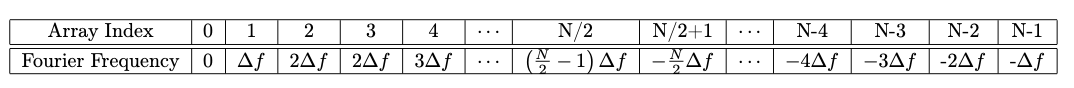

Let's take an example.

### Example 1

We are sampling a data at a rate 300 Hz for a duration of 10 seconds. The data signal consists of three sinusoidal frequencies 20 Hz, 50 Hz and 100 Hz with amplitude 5,3 and 8 unit, respectively,

$$
f(t) = 5\sin(2\pi\times20\times t) + 3\sin(2\pi\times 50\times t) + 8\sin(2\pi\times100\times t)
$$

What would be its Fourier transform?



(0.0, 150.0)

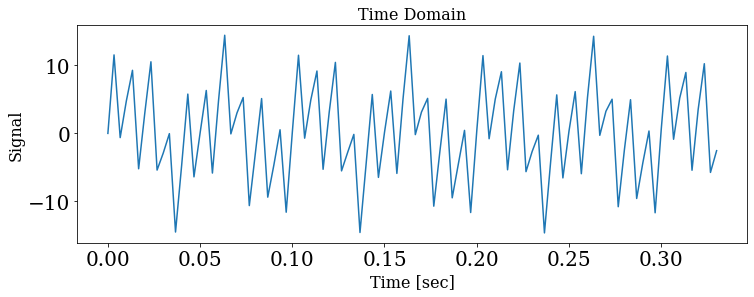

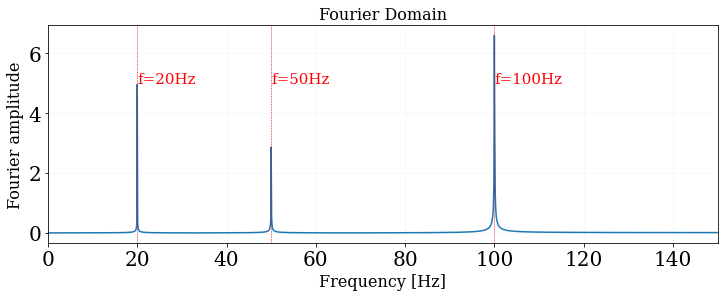

In [159]:
#=================
sps=300.0 # Hz
Tobs=10.0 # seconds
#=================



pi=np.pi 
dt=1/sps # second
f1=20.0
f2=50.0
f3=100.0
N=int(Tobs*sps)
x=np.linspace(0, Tobs, N)
y=5*np.sin(2*pi*f1*x)+3*np.sin(2*pi*f2*x)+8*np.sin(2*pi*f3*x)



# plotting the signal
f1=plt.figure(figsize=[12,4])
plt.plot(x[:100], y[:100])
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('Time Domain')



# Lets compute the frequency array

df=1/Tobs  # frequency resolution
f=np.arange(0,N//2)*df

# We ignore the N/2 to N and consider only positive frequency coefficients 


# ================= compute Fourier coefficients ============
# fy=fft(y)      ## without normalization
fy=2*fft(y)/N  ## factor 2 appears because we are ignoring the power in the -ve frequency
# ===========================================================



# plotting the correspondinf spectrum
f2=plt.figure(figsize=[12,4])
plt.plot(f,np.abs(fy[:N//2]))
plt.xlabel('Frequency [Hz]' )
plt.ylabel('Fourier amplitude')
plt.title('Fourier Domain')
plt.axvline(x=20, color='r', ls='--', lw=0.5)
plt.text(20, 5, 'f=20Hz', color='r', fontsize=15)
plt.axvline(x=50, color='r', ls='--', lw=0.5)
plt.text(50, 5, 'f=50Hz', color='r', fontsize=15)
plt.axvline(x=100, color='r', ls='--', lw=0.5)
plt.text(100, 5, 'f=100Hz', color= 'r', fontsize=15)
plt.grid(alpha=0.3, color='c')
plt.xlim(0,150)

### Example 2 (Do it yourself)

We are sampling a data at a rate **120 Hz** for a duration of **10 seconds**. The data signal consists of one sinusoidal frequency i.e., 100 Hz with amplitude 5 unit, 

$$
f(t) = 5\sin(2\pi\times100\times t)
$$

What would be its Fourier transform?

In [49]:
## your code goes here; you can copy it from above and change the parameters ;-)
































#### Did you get the expected result? Could you recover the 100 Hz frequency in the spectrum?  Can you guess where is the mistake here?


#### The signal is *undersampled*! And, here goes a thumb rule for this.

**Nyquist theorem:**  It states that to reconstruct a continuous analog signal from its sampled version accurately, **the sampling rate must be at least twice the highest frequency present in the signal**. This ensures that there are enough samples taken per unit of time to capture all the details of the original waveform without introducing **aliasing**, which can cause distortion or artifacts in the reconstructed signal.

$$
$$

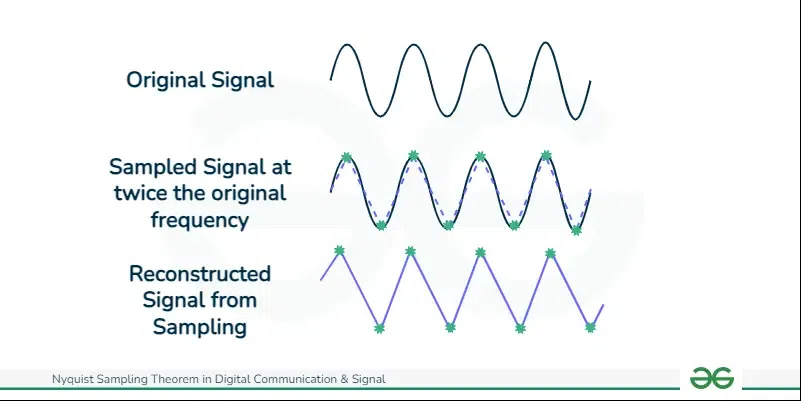

$$
$$

**Aliasing** in Nyquist Theorem is simply referred to as the unnatural disturbance that may occur during when the signals are reconstructed from one form to another. It may be referred to as the unwanted frequencies in an audio recording or strange patterns in an image or information. Jitter noise in audio may be regarded as Aliasing. 

### Example 3 (Do it yourself)

We are sampling a data at a rate **1000 Hz** for a duration of **1 second**. The data signal consists of one sinusoidal frequency i.e., 100 Hz with amplitude 2 unit, 

$$
f(t) = 2\sin(2\pi\times100\times t)
$$

What would be its Fourier transform?

In [58]:
## your code goes here


























#### Now you could recover the 100 Hz frequency in the spectrum, is not it?  But, what about the sharpness of the Fourier peak? 


The spectrum has a poor frequency resolution. Peaks become sharper with increase in the observation time. The longer you observe the signal, the finer resolved are the frequency channels.


- A small signal length results in fast measurement repetitions with a coarse frequency resolution.
- A large signal length results in slower measuring repetitions with fine frequency resolution.


Repeat the above example with different duration of observation i.e. $T_{obs}$ and see it yourself.

$$
$$

---

#### Smearing

In the Fourier transformation, the assumption is that the sampled signal segment is repeated periodically for an **infinite** period of time. This brings two conclusions:

- The FFT is only suitable for periodic signals.
- The sampled signal segment must contain a whole number of periods.

It can be seen that the second condition would apply only to very few signals. The sampling of a signal whose frequencies are not an integer multiple of df would begin and end within a block of $2^n$ samples with different values. This results in a jump in the time signal, and a "smeared" FFT spectrum (also known as Leakage)


#### Window function to prevent smearing

In order to prevent this smearing, in practice "windowing" is applied to the signal sample. Using a weighting function, the signal sample is more or less gently turned on and off. The result is that the sampled and subsequent "windowed" signal begins and ends at amplitude zero. The sample can now be repeated periodically without a hard transition.
 

(40.0, 80.0)

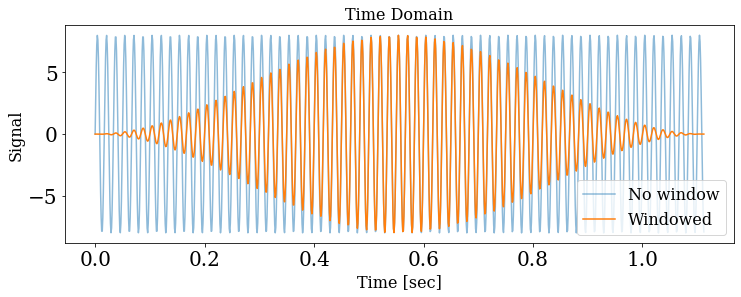

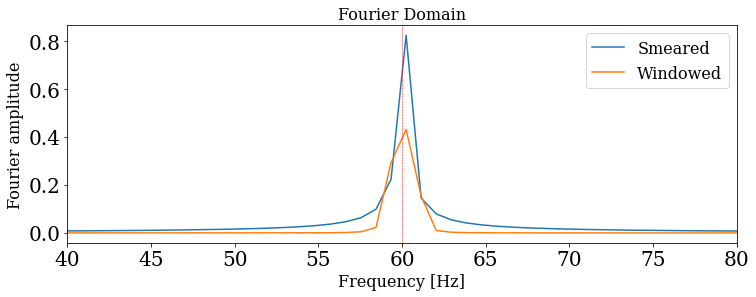

In [180]:
import scipy.signal.windows as wd

#=================
sps=1000.0 # Hz
Tobs=10 # seconds
N_truncate = 1113   # for no smear, put N_truncate=N
w = wd.hann(N_truncate)
#=================



pi=np.pi 
dt=1/sps # second
f1=60.0
N=int(Tobs*sps)
x=np.linspace(0, Tobs, N)
y=8*np.sin(2*pi*f1*x)  

x = x[0:N_truncate]
y = y[0:N_truncate]


# plotting the signal
f1=plt.figure(figsize=[12,4])
plt.plot(x, y, alpha=0.5, label='No window')
plt.plot(x, y*w, label='Windowed')
plt.xlabel('Time [sec]')
plt.ylabel('Signal')
plt.title('Time Domain')
plt.legend()


# Lets compute the frequency array

df=1/x[len(x) - 1]  # frequency resolution
f=np.arange(0,N_truncate//2)*df

# fy_windowed=fft(y*w)      ## without normalization
fy=2*fft(y)/N               ## factor 2 appears because we are ignoring the power in the -ve frequency
fy_windowed=2*fft(y*w)/N  


# plotting the correspondinf spectrum
f2=plt.figure(figsize=[12,4])
plt.plot(f,np.abs(fy[:N_truncate//2]), label='Smeared')
plt.plot(f,np.abs(fy_windowed[:N_truncate//2]), label='Windowed')
plt.xlabel('Frequency [Hz]' )
plt.ylabel('Fourier amplitude')
plt.title('Fourier Domain')
plt.axvline(x=60, color='r', ls='--', lw=0.5)
plt.legend()
plt.xlim(40,80)

### Sunspot number time series and its power density spectrum


Download the data file from [here](https://drive.google.com/file/d/1XHSv1-QW-aGeYTmOKDnl6aq81yT1_1EQ/view?usp=sharing) and save it in the same folder where your notebook is saved.

$$
$$

A Power Spectral Density (PSD) is the measure of signal's power content versus frequency. A PSD is typically used to characterize broadband random signals. The amplitude of the PSD is normalized by the spectral resolution employed to digitize the signal.

/tmp/ipykernel_388606/277935503.py:45: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,0.5)


(0.001, 100)

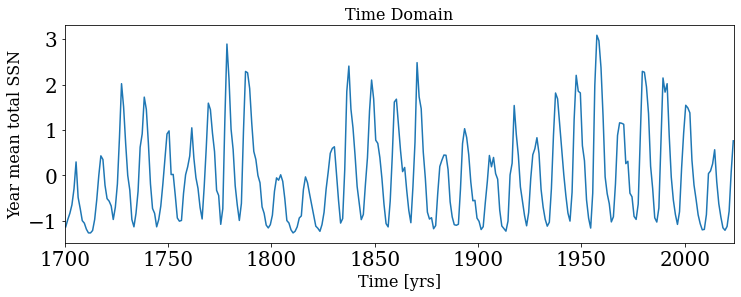

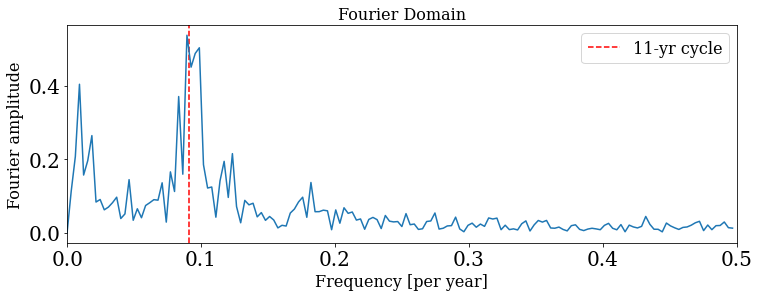

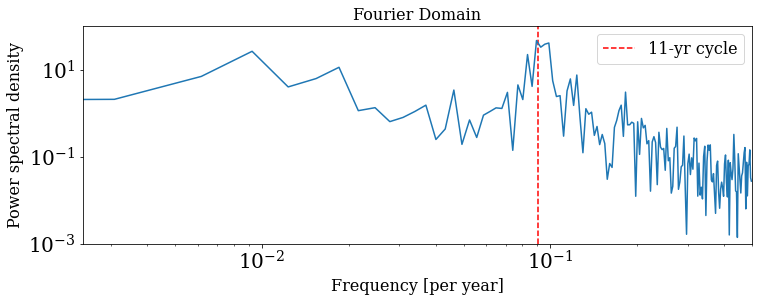

In [230]:
data = np.loadtxt('ssn.txt')
t = data[:,0]
ssn = data[:,1]
ssn = (ssn-np.mean(ssn))/np.std(ssn) # standardizing the time series

dt = t[1]-t[0] # year
sps = 1/dt
N = len(t)
Tobs=N

# plotting the signal
f1=plt.figure(figsize=[12,4])
plt.plot(t, ssn)
plt.xlabel('Time [yrs]')
plt.ylabel('Year mean total SSN')
plt.title('Time Domain')
plt.xlim(1700,2024)

# Lets compute the frequency array
df=1/Tobs  # frequency resolution
f=np.arange(0,N//2)*df
fy=2*fft(ssn)/N
psd = (np.abs(fy[:N//2]))**2
psd = psd/(2*df)

# plotting the corresponding Fourier spectrum
f2=plt.figure(figsize=[12,4])
plt.axvline(x=1/11, color='r', ls='--', lw=1.5, label='11-yr cycle')
plt.plot(f,np.abs(fy[:N//2]))
plt.xlabel('Frequency [per year]' )
plt.ylabel('Fourier amplitude')
plt.title('Fourier Domain')
plt.legend()
# plt.ylim(0,35)
plt.xlim(0,0.5)

# plotting the corresponding power density spectrum
f3=plt.figure(figsize=[12,4])
plt.axvline(x=1/11, color='r', ls='--', lw=1.5, label='11-yr cycle')
plt.loglog(f,psd)
plt.xlabel('Frequency [per year]' )
plt.ylabel('Power spectral density')
plt.title('Fourier Domain')
plt.legend()
plt.xlim(0,0.5)
plt.ylim(0.001,100)

#### So many peaks! Which one to pick?

Time series gleaned from observation of natural phenomena are mostly contaminated by the presence of noise which in turn poses challenges in determining the ‘true’ frequencies present in the signal.The above exercise is one of the examples for this.


In the next module, we will discuss characterizing the noise in a given time series. We will estimate statistical regression parameters and employ them to distill out significant frequencies from the noisy background in the Fourier spectrum. 

We conclude the current module here.

## Acknowledgement

Chitradeep Saha, the creator of this notebook, would like to acknowledge various resources collected from [Prof. Rajesh K. Nayak](https://www.iiserkol.ac.in/~rajesh/my_python.html), [Shaw Talebi](https://medium.com/swlh/the-fast-fourier-transform-fft-5e96cf637c38), [GeeksforGeeks](https://www.geeksforgeeks.org/nyquist-sampling-theorem/) and [NTIAudio](https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft)